In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [4]:
train = pd.read_csv("city_day.csv")

In [5]:
# Data Preprocessing
train = train.dropna()  # Remove missing values
train = train.drop_duplicates()  # Remove duplicate rows
train.drop(columns=['City'], inplace=True)  # Drop 'City' column

'''# Convert 'Date' column to datetime
train['Date'] = pd.to_datetime(train['Date'])
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day'''
train.drop(columns=['Date'], inplace=True)  

train = train.dropna(subset=['AQI_Bucket'])  
train['AQI_Bucket'] = train['AQI_Bucket'].replace({
    'Good': 5,
    'Satisfactory': 4,
    'Moderate': 3,
    'Poor': 2,
    'Very Poor': 1,
    'Severe': 0 
})


In [6]:
X = train[[ 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 
           'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene','AQI','AQI_Bucket']]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
a = DBSCAN(
    eps=0.5,
    min_samples=5,
)

In [35]:
labels = a.fit_predict(X_scaled)
b = np.unique(labels)
train.value_counts('labels')

labels
-1     4785
 0      619
 1      250
 10      66
 22      57
 25      52
 27      45
 18      35
 31      31
 14      29
 15      22
 34      13
 12      12
 41      12
 19      11
 29      11
 20      10
 11      10
 16      10
 17      10
 24      10
 7        9
 21       8
 6        8
 28       8
 38       7
 35       7
 13       7
 4        7
 26       6
 33       6
 8        6
 37       6
 9        6
 39       6
 5        5
 23       5
 30       5
 3        5
 32       5
 36       5
 40       5
 2        4
Name: count, dtype: int64

In [ ]:
train['labels'] = labels

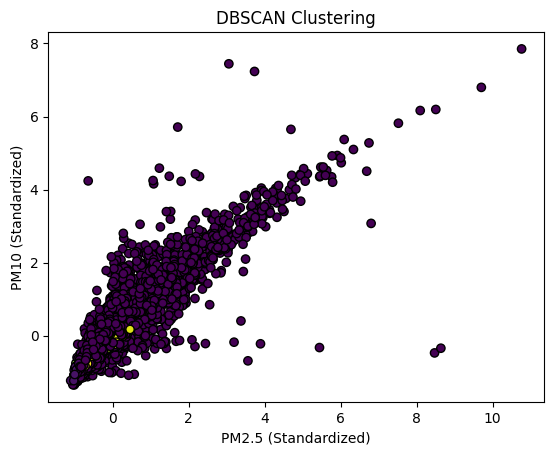

Unique clusters: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]


In [28]:
train['Cluster'] = labels

# Visualization (Using first two features for scatter plot)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.xlabel("PM2.5 (Standardized)")
plt.ylabel("PM10 (Standardized)")
plt.title("DBSCAN Clustering")
plt.show()

# Print unique cluster labels
print("Unique clusters:", np.unique(labels))